In [91]:
"""Reads in and plots data generated from L. Roberts' C++ code for the isothermal case"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def readData(path):
    """Reads in csv data generated by L. Roberts' code for isothermal winds
    Takes file path (string) and returns an array of data sets, where each set is a 2D array of x, u, s values for a given x0"""
    dataFile=open(path,"r")
    dataObj=pd.read_csv(dataFile,delim_whitespace=True)
    dataFile.close()
    dataFull=dataObj.to_numpy()

    dataPartitioned=[]
    last=0

    for i in range(len(dataFull)):
        if dataFull[i][0]==0:
            dataPartitioned.append(dataFull[last:i])
            last=i
    dataPartitioned.append(dataFull[last:])
    return dataPartitioned

def plotData(dataPartitioned):
    '''Takes an array of data sets and plots u vs x, returns 0 and outputs the plot'''
    plt.figure(1)
    plt.xlim(1, 50)
    plt.ylim(0, 5)
    for i in range(len(dataPartitioned)):
        #plt.figure(i)    #uncomment to separate graphs
        plt.scatter(np.exp(dataPartitioned[i][:,1]),np.exp(dataPartitioned[i][:,2]-dataPartitioned[i][:,3]/2),s=1)
    plt.figure(2)
    plt.xlim(1, 50)
    plt.ylim(0, 5)
    plt.scatter(np.exp(dataPartitioned[-1][:,1]),np.exp(dataPartitioned[-1][:,2]-dataPartitioned[i][:,3]/2),s=1)
    return 0

0

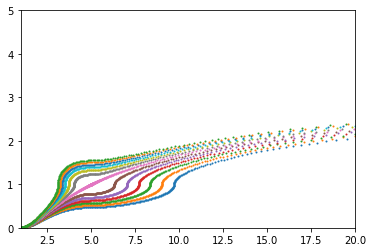

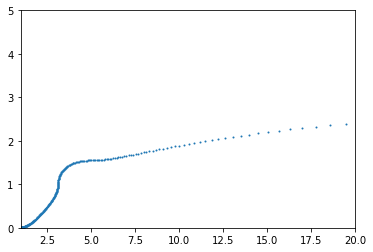

In [75]:
d=readData("../../nuwind/exe/isothermal.out")
plotData(d)

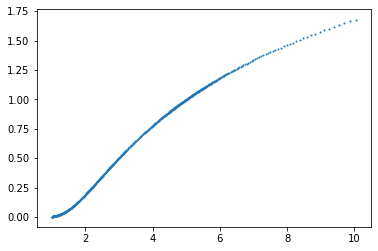

In [39]:
"""Reads in data for a single curve from my C++ code and plots it"""

def readMyData(path):
    dataFile=open(path,"r")
    dataObj=pd.read_csv(dataFile,delim_whitespace=True)
    dataFile.close()
    dataFull=dataObj.to_numpy()
    return dataFull

d2=readMyData("../C++/NDWSolver/NDWSolver/output.txt")
plt.scatter(np.exp(d2[:,1]),np.exp(d2[:,2]),s=1);

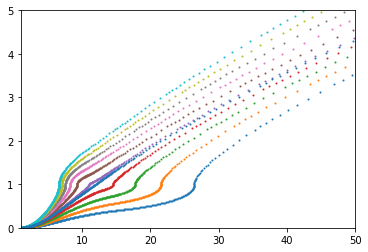

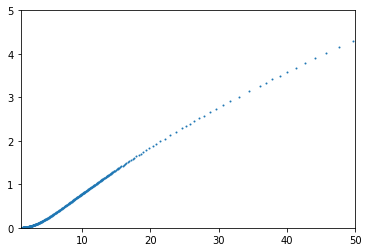

In [92]:
d=readData("../C++/NDWSolver/NDWSolver/multiOutput.txt");
plotData(d);